In [1]:
# Make the required import for directory access
import os

In [2]:
# Name of the new model
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
# Name for the pretrained model
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
# Link for the pretrained model download
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
# Name of the Script to be used to generate the TFRecord
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
# Name of the label map file
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
# Add OS paths to the required directory
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
# List some files required for model training
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
!dir

In [ ]:
# Create the required directories
# NOTE: This does not need to be re-run
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [5]:
import os
api_model_path = os.path.join('tensorflow', 'models')
api_model_path

'tensorflow\\models'

In [ ]:
# NOTE: Do not re-run this after running it once
# Clone the object detection models directory
!git clone https://github.com/tensorflow/models {api_model_path}

In [ ]:
# THIS IS WHERE THE INSTALLATIONS FOR MODEL TRAINING BEGIN
!pip install wget

In [6]:
!pip list
# Get name for the operating system
os.name
import wget

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.2.0
beautifulsoup4               4.10.0
bleach                       4.1.0
bs4                          0.0.1
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.11
colorama                     0.4.4
contextlib2                  21.6.0
cycler                       0.11.0
Cython                       3.0.0a10
debugpy                      1.5.1
decorator                    5.1.0
defusedxml                   0.7.1
entrypoints                  0.3
flatbuffers                  2.0
gast                         0.5.3
gin-config                   0.5.0
google-auth                  2.6.0
google-auth-oauthlib        

In [ ]:
# NOTE: Do not re-run unless verification script fails 
# Link to install the protocol buffers
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
# wget is the python library to fetch online data
wget.download(url)
# Move the downloaded folder to the previously specified path
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
# Move to the new path and extract the ZIP folder
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
# Add the protocol buffer to the environment variable
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e .

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation by running a verification script
!python {VERIFICATION_SCRIPT}

In [ ]:
# These were the installations required to remove the errors
!pip install tensorflow --upgrade
!pip install cycler
!pip install kiwisolver
!pip install pyyaml
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2
!pip install Pillow

In [7]:
# Import Object Detection API from Tensorflow - Restart Kernel if this does not work
import object_detection

In [ ]:
!pip list
!pip install bs4

In [ ]:
# Download the pretrained model from the specified URL
wget.download(PRETRAINED_MODEL_URL)
# Move the extracted folder to the specified path
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
# Extract the fetched folder
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

In [ ]:
labels = [{'name':'Car', 'id':1}, {'name':'Truck', 'id':2}, {'name':'Pedestrian', 'id':3}, {'name':'Bus', 'id':4}, {'name':'Sign', 'id':5}, {'name':'TrafficLight', 'id':6}, {'name':'FireHydrant', 'id':7}, {'name': 'Bicycle', 'id':8}, {'name':'Motorcycle', 'id':9}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
# Move all the requirements to a requirements.txt file to set a github milestone
!pip freeze >> requirements.txt

In [ ]:
!dir

In [ ]:
# Download the generate tf record script
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

In [ ]:
# Missing installations in case the record file generation does not work
!pip install pytz

In [ ]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [8]:
# Update the pipeline.config file for transfer learning
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [18]:
# Open the config file and store it in a variable
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 9
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
# Create the configuration file and update information
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [ ]:
# Display the updated file
config

In [ ]:
# Training the model
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
# Create and format a command to start model training
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
command

In [ ]:
# Run the command here or run it in the terminal to see real time progress

In [ ]:
# Evaluate the model and get the precision and accuracy
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
command

In [9]:
# LOADING THE MODEL FOR DETECTION
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# Make sure to specify the latest checkpoint in the paths
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-23')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [11]:
# Detect from image
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test.jpg')

# List the classes in their order
label_classes = ['Car', 'Truck', 'Pedestrian', 'Bus', 'Sign', 'Trafficlight', 'FireHydrant', 'Bicycle', 'Motorcycle']

# Average estimates in cm
# Estimates Car
CAR_AVERAGE_WIDTH_SIDE = 448
CAR_AVERAGE_WIDTH_FRONTAL = 177
CAR_AVERAGE_HEIGHT = 160

# Estimates Truck
TRUCK_AVERAGE_WIDTH_SIDE =  1470
TRUCK_AVERAGE_WIDTH_FRONTAL = 259
TRUCK_AVERAGE_HEIGHT = 427

# Estimates Pickup Truck
PICKUP_TRUCK_AVERAGE_WIDTH_SIDE = 596 
PICKUP_TRUCK_AVERAGE_WIDTH_FRONTAL = 203
PICKUP_TRUCK_AVERAGE_HEIGHT = 191

# Estimates Pedestrian
AVERAGE_PEDESTRIAN_WIDTH = 55
AVERAGE_PEDESTRIAN_HEIGHT = 175 

# Estimates Bus
BUS_AVERAGE_WIDTH_SIDE = 1470
BUS_AVERAGE_WIDTH_FRONTAL = 254
BUS_AVERAGE_HEIGHT = 320

# Estimates Sign
AVERAGE_SIGN_WIDTH = 84
AVERAGE_SIGN_HEIGHT = 75

# Estimates Traffic Light
AVERAGE_TRAFFIC_LIGHT_WIDTH = 36
AVERAGE_TRAFFIC_LIGHT_HEIGHT = 107

# Estimates Fire Hydrant
AVERAGE_FIRE_HYDRANT_WIDTH = 28
AVERAGE_FIRE_HYDRANT_HEIGHT = 81

# Estimates Bicycle
AVERAGE_BICYCLE_WIDTH_SIDE = 175
AVERAGE_BICYCLE_WIDTH_FRONTAL = 55 
AVERAGE_BICYCLE_HEIGHT = 105

# Estimates Motorcycle
AVERAGE_MOTORCYCLE_WIDTH_SIDE = 190
AVERAGE_MOTORCYCLE_WIDTH_FRONTAL = 73
AVERAGE_MOTORCYCLE_HEIGHT = 110

(720, 1280, 3)
Image width:  287.2  height:  300.73
Detection classes:  Car
Detection Confidence:  99.11144375801086 %
Image width:  127.9  height:  123.37
Detection classes:  Truck
Detection Confidence:  93.26727390289307 %
Image width:  247.18  height:  477.76
Detection classes:  Car
Detection Confidence:  89.9471640586853 %
Image width:  160.82  height:  238.39
Detection classes:  Car
Detection Confidence:  82.13536143302917 %
Image width:  75.73  height:  99.81
Detection classes:  Car
Detection Confidence:  74.65967535972595 %
Image width:  66.04  height:  91.22
Detection classes:  Car
Detection Confidence:  73.60765933990479 %
Image width:  199.78  height:  169.77
Detection classes:  Car
Detection Confidence:  59.18194651603699 %
Image width:  220.55  height:  143.94
Detection classes:  Car
Detection Confidence:  54.19076681137085 %
Image width:  118.74  height:  37.51
Detection classes:  Pedestrian
Detection Confidence:  34.699636697769165 %
Image width:  109.38  height:  45.56
D

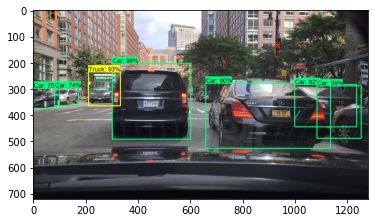

In [23]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
print(img.shape)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

for i in range(0, 10):
    
    # Define X and Y coordinates for boundary boxes
    for j in range(0, 4):
        if j == 0:
            x1 = detections['detection_boxes'][i][j] * 720
            # print("x1: ", x1)
        if j == 1:
            y1 = detections['detection_boxes'][i][j] * 1280
            # print("y1: ", y1)
        if j == 2:
            x2 = detections['detection_boxes'][i][j] * 720
            # print("x2: ", x2)
        if j == 3:
            y2 = detections['detection_boxes'][i][j] * 1280
            # print("y2: ", y2)
        
    # Calculate and Display boundary box width and height
    width = x2 - x1
    height = y2 - y1
    print("Image width: ", round(width, 2), " height: ", round(height, 2))
    
    # Display Labels and confidence
    print("Detection classes: ", label_classes[detections['detection_classes'][i]])
    print("Detection Confidence: ", detections['detection_scores'][i] * 100, "%")

    
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=7,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
# Object detection in video
cap = cv2.VideoCapture('video1.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    # Display the list of deteciions
    print("Detection boxes: ", detections['detection_boxes'])
    print("Detection classes: ", detections['detection_classes'])
    print("Detection Scores: ", detections['detection_scores'])

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.4,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

Detection classes:  [1 0 1 1 2 0 4 4 0 4 4 2 2 0 1 2 2 3 2 2 1 2 2 7 2 5 1 2 4 2 4 2 4 4 0 4 0
 7 2 1 3 2 1 0 4 4 1 5 1 2 2 7 4 0 2 2 0 2 4 2 2 4 2 2 5 4 4 7 7 8 2 8 2 0
 8 3 3 4 2 2 2 4 2 3 2 6 4 4 8 0 4 0 4 2 2 5 2 0 4 2]
Detection classes:  [1 2 1 2 0 0 1 2 0 2 5 7 2 1 0 2 8 7 4 4 2 5 7 4 2 0 3 2 5 0 4 7 0 2 0 2 4
 4 4 3 2 2 0 8 0 1 2 2 2 2 5 4 2 4 4 0 2 5 5 2 2 0 2 7 4 7 4 4 2 0 8 4 2 6
 0 0 4 3 5 5 0 4 0 1 2 0 2 4 2 7 2 2 5 5 5 2 1 2 4 4]
Detection classes:  [1 2 1 5 1 0 1 4 4 2 2 7 2 0 2 0 2 1 7 0 2 1 5 7 0 2 2 0 0 7 2 0 4 5 8 8 2
 2 8 2 0 0 4 0 7 0 2 1 0 7 0 3 4 2 2 2 1 4 4 1 2 2 0 0 2 2 0 0 0 8 0 3 0 5
 6 0 2 0 7 3 2 5 2 4 4 4 4 4 0 4 3 0 4 1 1 2 2 5 4 4]
Detection classes:  [2 2 0 2 2 5 2 0 2 4 1 4 8 8 0 1 0 5 4 2 4 1 2 2 0 2 2 0 1 2 0 2 2 0 2 5 7
 2 1 2 4 4 2 2 2 7 4 7 6 2 2 8 0 1 7 4 1 2 8 4 2 4 2 5 2 4 2 2 2 0 2 2 4 2
 1 7 2 0 8 2 2 2 4 0 2 0 7 4 4 4 2 2 7 8 7 2 2 0 0 0]
Detection classes:  [2 2 4 1 2 1 0 2 0 2 1 8 2 2 4 7 7 2 4 1 3 2 7 0 4 2 2 2 0 2 1 1 2 2 1 1 4
 4 4 4 5 

Detection classes:  [1 0 1 0 0 1 0 1 2 0 0 0 0 5 0 2 2 0 1 0 2 1 5 0 0 4 5 3 0 0 5 2 2 4 5 2 8
 0 4 6 5 4 2 0 5 0 2 4 0 5 0 0 4 5 4 5 4 0 0 0 0 0 5 0 4 2 2 5 8 2 2 2 0 4
 4 4 5 4 4 1 4 2 2 5 0 0 5 0 4 4 4 2 6 6 4 5 1 5 1 5]
Detection classes:  [1 1 0 0 0 0 0 0 0 1 0 4 6 8 0 1 0 2 0 1 4 4 0 0 2 5 5 2 0 1 2 4 2 5 5 4 0
 1 0 5 5 0 0 2 5 2 2 0 3 6 0 5 2 2 4 4 4 4 4 4 4 2 5 5 2 2 0 0 2 4 4 4 4 5
 0 0 5 5 4 2 2 5 4 7 5 0 4 2 4 4 0 5 5 2 0 4 2 5 4 2]
Detection classes:  [1 0 0 1 0 0 0 0 1 2 0 2 0 0 0 2 2 2 2 2 0 0 2 0 2 5 2 7 6 0 4 0 4 2 4 3 2
 4 2 2 2 4 4 0 8 0 2 1 2 0 2 0 2 0 5 2 0 0 0 6 4 4 0 5 2 7 5 0 2 2 4 0 5 4
 2 4 2 4 5 0 5 2 4 2 2 2 2 5 2 2 2 0 1 4 0 4 0 6 2 0]
Detection classes:  [1 0 2 0 1 0 0 0 2 2 2 4 0 1 2 0 2 2 2 7 2 2 5 0 5 2 4 7 0 2 6 2 4 2 0 2 0
 4 7 4 5 2 2 0 2 2 5 4 5 0 5 0 2 0 2 2 4 2 0 0 2 3 0 2 5 6 4 2 8 7 5 0 0 4
 4 2 4 4 2 2 1 0 0 4 0 2 4 5 4 2 0 4 5 4 2 5 2 2 2 4]
Detection classes:  [1 0 0 1 1 0 0 0 2 0 2 2 0 2 2 0 0 4 5 4 4 4 4 2 5 3 2 5 0 2 4 2 2 0 4 2 2
 4 2 0 2 

Detection classes:  [4 5 0 4 1 2 5 2 5 0 2 5 4 0 5 4 8 3 2 5 2 4 4 0 4 3 4 7 6 0 0 0 2 8 0 4 2
 5 4 2 0 1 0 0 6 0 3 4 5 4 4 2 4 2 2 2 2 7 0 2 0 0 0 0 4 3 2 8 2 4 7 5 6 1
 0 3 2 2 5 4 0 2 4 2 2 4 0 2 4 3 4 3 0 0 1 4 0 2 2 7]
Detection classes:  [0 5 4 1 2 4 2 2 1 7 7 8 0 8 2 4 2 1 4 2 0 5 5 8 2 2 0 5 1 3 2 0 4 2 2 4 4
 4 5 0 0 0 4 4 7 4 7 2 6 4 3 0 0 0 3 2 0 2 7 3 8 5 2 4 0 4 4 5 4 0 0 0 2 0
 2 5 2 1 0 0 2 4 0 0 0 7 5 5 3 4 7 2 0 2 0 0 0 3 2 2]
Detection classes:  [0 5 0 4 0 2 1 4 5 5 4 2 4 3 7 0 0 8 0 5 2 2 5 4 5 0 2 0 4 2 0 2 4 2 5 6 3
 2 4 2 0 0 0 4 0 4 0 4 4 5 0 5 0 8 0 0 0 4 0 0 6 0 7 5 4 0 0 0 0 0 2 0 0 5
 4 0 5 5 2 2 4 0 0 0 2 2 0 0 4 0 0 2 0 5 4 2 4 0 4 7]
Detection classes:  [0 0 0 0 0 0 3 0 0 0 1 2 0 0 0 0 0 0 2 0 4 2 0 8 0 2 0 0 1 0 0 0 4 0 4 0 0
 2 0 0 0 4 0 0 0 0 0 0 2 3 0 4 0 0 2 0 0 0 0 0 2 0 0 2 2 0 2 0 0 3 0 6 2 0
 0 0 0 4 4 4 0 4 2 0 4 2 0 7 0 2 0 2 0 0 4 7 0 2 4 0]
Detection classes:  [0 1 0 4 2 2 0 2 2 0 0 2 2 0 2 4 3 2 0 4 6 0 3 0 4 1 0 4 2 2 0 4 8 0 3 0 2
 4 0 1 0 

Detection classes:  [1 0 0 0 0 3 2 4 0 2 4 4 1 2 4 2 0 2 0 0 0 0 4 4 4 4 0 2 0 0 2 0 2 4 4 0 4
 4 4 4 2 2 2 0 2 0 2 0 2 0 4 0 0 2 0 0 2 4 4 4 1 4 0 0 0 0 2 4 2 1 0 0 5 4
 0 0 0 0 0 4 4 4 4 0 2 0 0 0 2 1 4 2 2 0 0 3 1 0 0 0]
Detection classes:  [0 0 0 0 1 0 0 0 0 0 0 0 0 2 8 2 6 2 2 2 4 4 4 6 0 2 0 0 0 0 0 0 0 4 4 0 0
 4 0 4 0 0 4 0 0 4 4 4 4 0 4 0 4 2 2 4 4 0 8 0 4 0 0 0 4 2 4 0 2 0 5 2 0 0
 0 4 0 2 0 2 2 0 0 4 0 0 6 4 2 0 0 0 0 0 0 4 5 0 0 5]
Detection classes:  [0 1 3 0 0 0 2 0 8 2 0 0 0 8 0 0 7 0 2 0 2 2 0 8 4 0 2 4 0 5 0 3 1 0 0 0 8
 0 4 0 4 0 2 1 0 4 4 0 0 0 4 1 2 0 2 4 4 0 0 4 0 0 2 0 4 4 4 4 0 0 0 0 0 2
 4 2 2 2 4 4 0 2 0 2 0 0 0 0 0 4 0 3 0 2 8 2 0 5 0 2]
Detection classes:  [0 0 0 0 0 2 2 0 0 4 0 0 0 3 4 0 2 0 0 0 0 0 0 4 0 4 4 0 4 4 0 0 2 0 4 4 0
 4 2 4 2 4 4 4 0 4 2 2 0 0 0 2 2 0 2 4 0 0 0 3 2 4 0 5 0 4 4 3 2 0 4 0 6 0
 4 3 0 4 0 0 4 2 0 0 4 0 0 5 0 0 0 0 4 0 6 0 0 0 3 2]
Detection classes:  [0 0 0 0 0 0 0 2 0 0 3 4 0 2 2 4 0 4 0 0 0 4 0 0 4 4 0 0 4 4 0 4 0 2 0 4 4
 2 4 2 0 

Detection classes:  [2 2 2 2 0 2 0 0 2 2 0 6 2 2 0 2 2 0 2 2 6 2 0 4 0 4 6 0 0 4 0 4 2 6 6 0 6
 2 4 0 2 0 2 4 0 2 0 3 4 0 2 2 2 0 0 2 0 0 5 4 0 0 6 6 2 2 2 0 2 0 2 6 4 6
 6 0 0 0 2 0 3 6 0 6 2 6 5 0 2 0 6 6 4 7 6 6 6 0 6 0]
Detection classes:  [2 2 2 2 3 2 2 2 2 2 6 2 2 0 2 0 2 6 2 6 2 2 2 2 2 0 2 0 2 2 0 6 6 0 0 0 2
 2 0 0 6 2 2 6 6 2 0 6 6 0 0 6 6 2 6 6 0 2 4 2 2 6 2 6 6 6 6 5 2 6 0 6 6 6
 6 6 0 2 0 6 5 0 2 2 2 6 6 6 0 2 6 2 6 6 6 6 2 2 2 0]
Detection classes:  [3 2 2 2 2 2 2 2 2 0 6 2 2 6 0 2 6 0 2 2 2 6 2 6 0 6 2 0 6 6 6 4 6 2 6 6 0
 2 0 0 2 2 2 6 2 2 2 6 0 6 0 0 6 2 2 2 2 6 0 6 2 0 0 6 6 2 2 6 2 2 0 4 2 6
 0 2 2 6 2 2 0 4 2 2 2 2 6 6 4 2 0 2 2 6 6 6 5 4 6 3]
Detection classes:  [2 2 2 2 2 2 2 0 2 2 2 2 2 4 2 6 6 2 0 3 2 0 2 2 0 2 2 2 6 2 2 2 6 6 2 2 0
 6 6 0 2 2 0 2 0 2 6 2 6 2 6 6 4 2 0 4 2 0 2 2 4 0 0 6 0 6 2 0 6 2 2 2 2 2
 2 6 6 0 2 2 6 2 6 0 0 2 2 2 3 4 0 6 4 4 2 0 6 0 6 6]
Detection classes:  [2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 3 6 0 2 6 2 0 2 0 6 6 6 2 6 2 6 2 2 2 2 2
 4 2 0 2 

Detection classes:  [0 2 0 0 1 0 2 2 2 2 2 0 2 2 2 0 0 2 0 2 0 0 0 0 2 0 2 7 0 3 2 0 4 0 4 0 2
 0 0 3 4 0 0 0 2 4 0 0 0 2 4 2 0 2 0 0 2 0 2 7 0 4 0 4 0 0 6 4 0 2 0 4 4 3
 0 6 4 1 6 2 0 5 2 0 0 0 0 2 3 2 6 2 4 2 0 4 0 2 4 6]
Detection classes:  [1 0 0 0 2 0 2 4 2 2 2 0 0 0 0 2 2 0 4 0 2 0 2 2 2 2 2 0 0 0 0 4 0 2 0 0 2
 2 4 2 0 2 0 0 4 4 0 2 0 2 4 4 4 2 2 0 0 0 2 0 0 2 2 2 2 0 0 2 2 0 2 4 2 4
 0 2 6 4 0 3 0 2 5 0 0 0 4 0 2 0 3 3 3 4 5 2 2 0 4 4]
Detection classes:  [0 0 0 2 4 2 2 2 0 2 2 1 0 2 0 4 0 2 4 2 2 0 0 1 0 0 2 2 2 0 3 0 0 2 0 0 4
 4 0 0 2 0 7 4 2 0 0 0 0 0 7 0 4 2 0 4 0 2 2 4 4 4 4 4 0 2 0 4 4 4 0 0 7 0
 0 2 2 0 7 2 4 0 0 3 0 0 0 4 0 4 2 0 2 1 1 1 0 4 2 4]
Detection classes:  [0 0 0 1 2 0 0 3 2 3 0 2 0 0 2 2 0 0 0 1 2 2 2 1 0 0 0 0 2 0 2 2 3 4 3 1 4
 4 1 4 4 4 2 1 2 2 0 0 0 4 2 4 3 2 1 2 1 0 0 4 0 2 2 4 0 4 0 2 0 0 2 0 2 0
 2 4 0 0 2 0 2 4 0 0 0 1 2 1 2 4 7 0 8 4 0 4 4 4 4 7]
Detection classes:  [0 1 0 0 2 2 0 2 1 3 1 0 2 2 0 4 7 2 0 0 2 0 0 4 0 0 0 0 0 2 3 4 2 2 2 2 0
 7 0 0 0 

Detection classes:  [0 2 2 0 1 2 2 2 6 2 4 2 0 2 2 0 2 2 0 0 0 4 2 2 2 6 2 2 2 2 4 2 2 5 2 2 2
 0 2 0 4 0 4 4 4 1 2 2 2 0 2 4 4 2 6 2 7 4 0 2 2 4 2 0 4 0 2 4 5 2 2 5 7 0
 3 4 2 2 6 0 4 7 4 2 7 2 4 2 4 0 2 4 2 0 4 0 2 4 4 2]
Detection classes:  [0 0 1 2 2 2 3 2 2 4 6 0 0 0 2 4 2 2 0 2 2 2 2 2 2 6 2 0 0 1 2 2 0 0 4 2 2
 2 2 2 6 5 0 2 2 3 2 0 2 5 2 4 2 2 7 2 6 4 7 4 4 2 0 4 2 7 2 7 4 2 2 4 2 0
 2 4 7 4 2 4 0 2 2 2 2 4 6 0 6 0 0 4 4 4 2 0 6 4 0 2]
Detection classes:  [0 1 0 3 2 2 0 4 2 2 0 2 2 4 2 0 0 2 2 5 0 0 2 4 0 2 2 5 0 0 2 1 2 3 4 4 0
 0 2 2 4 2 4 0 2 4 2 2 2 0 2 4 2 4 2 2 2 0 4 2 2 4 5 2 5 4 7 4 4 0 4 4 2 4
 4 0 4 4 0 4 2 2 2 2 2 2 2 2 0 2 7 2 0 6 0 0 0 4 2 2]
Detection classes:  [1 0 2 2 2 2 2 0 4 2 4 2 2 1 3 0 2 2 2 0 2 4 2 2 4 5 0 4 4 0 2 0 5 2 4 4 0
 2 4 4 4 2 0 2 2 0 2 0 0 4 2 0 2 0 4 4 2 2 4 2 5 2 2 4 2 5 2 4 2 2 2 4 4 4
 4 4 0 4 0 0 4 2 2 4 4 2 0 0 2 4 2 4 4 2 4 2 0 4 2 0]
Detection classes:  [0 2 2 2 2 2 2 2 2 1 0 2 2 4 4 2 2 2 5 4 2 2 2 3 4 2 2 2 2 2 4 0 0 2 2 6 2
 0 5 8 0 

Detection classes:  [0 0 0 1 8 4 0 2 1 2 4 2 4 2 2 1 2 2 2 2 8 5 2 4 0 2 8 7 2 0 4 8 2 2 7 2 4
 2 5 2 1 2 2 8 2 3 7 8 0 0 4 1 4 7 0 4 1 2 2 3 5 2 4 2 0 4 2 4 2 0 0 7 4 4
 1 4 0 2 4 1 5 2 2 4 0 4 2 6 2 6 4 4 7 2 8 3 2 2 4 4]
Detection classes:  [0 0 1 0 4 1 0 4 8 4 4 2 4 4 2 0 2 1 4 2 5 0 2 1 8 0 5 4 3 4 4 0 0 5 4 4 0
 4 2 2 7 4 8 4 2 0 5 4 4 8 8 2 0 0 2 6 2 2 0 2 2 1 2 4 4 0 1 4 4 4 1 4 4 4
 0 0 2 5 4 2 4 2 4 4 7 5 3 2 1 4 6 3 2 7 2 8 5 2 0 2]
Detection classes:  [0 1 1 1 1 4 2 0 8 0 0 0 0 2 8 0 4 2 8 2 3 4 7 2 1 2 1 7 7 5 2 7 0 4 2 2 1
 1 8 4 2 0 0 4 2 4 4 2 4 1 4 8 2 8 0 0 8 1 4 1 8 0 4 2 8 2 4 7 4 0 4 7 2 4
 3 4 2 2 4 6 2 0 4 2 5 2 2 8 2 4 4 4 0 4 4 2 4 2 0 2]
Detection classes:  [0 1 1 1 0 4 4 2 2 0 8 0 2 4 4 4 0 1 2 4 2 4 2 0 4 4 4 7 2 4 8 4 2 4 0 4 4
 0 4 2 2 2 2 4 3 4 4 3 5 1 2 0 1 4 5 4 7 0 4 1 2 2 5 8 0 2 5 0 4 1 3 4 2 1
 6 4 5 2 1 4 2 4 2 2 2 0 4 6 2 2 5 4 0 0 1 2 7 2 0 2]
Detection classes:  [1 0 0 0 2 0 3 0 4 0 2 7 1 1 0 2 2 0 0 2 2 0 4 0 0 4 7 4 2 2 0 4 2 2 7 2 4
 0 0 0 4 

Detection classes:  [0 0 0 1 2 2 2 0 2 2 2 2 3 4 4 2 0 2 2 2 0 2 2 2 0 2 2 2 4 2 2 2 6 2 4 4 2
 2 2 0 0 4 4 7 4 4 8 2 2 0 2 2 2 6 6 4 6 8 2 4 4 2 4 5 1 2 0 2 2 7 2 4 2 4
 1 2 5 7 6 5 4 2 2 2 5 2 2 4 2 5 2 7 6 8 0 1 4 2 6 4]
Detection classes:  [0 0 4 1 2 0 2 1 0 0 2 4 2 2 2 2 2 4 2 2 4 2 2 1 2 2 0 2 6 2 2 2 6 0 2 2 1
 4 2 2 4 2 5 7 7 8 4 4 4 4 2 1 4 0 2 7 5 8 4 0 4 5 2 4 7 4 0 5 2 2 2 8 4 3
 4 0 2 4 2 2 1 8 4 6 5 2 3 4 4 4 2 2 2 0 5 2 4 4 0 5]
Detection classes:  [0 0 0 4 2 1 2 1 2 2 2 0 2 2 2 1 1 2 0 0 7 2 3 1 2 1 4 2 2 2 2 1 3 2 2 8 4
 2 2 2 2 7 0 2 2 2 0 2 2 0 0 4 2 4 8 4 0 6 0 4 2 2 6 4 4 6 0 4 4 2 8 2 2 6
 0 2 1 2 7 0 4 4 2 2 6 0 0 4 5 0 4 2 4 2 2 2 2 0 2 4]
Detection classes:  [0 2 2 2 4 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 4 2 2 0 2 0 2 2 2 0 1 2 1 2 4 1
 2 0 2 2 8 4 5 2 8 1 4 4 4 2 2 2 2 1 4 5 4 2 7 0 0 3 2 4 1 0 7 4 0 5 4 0 4
 4 2 2 4 4 7 2 4 7 8 4 0 2 2 8 3 4 0 2 2 4 2 2 0 2 2]
Detection classes:  [0 0 2 2 2 2 2 2 2 4 2 0 4 7 2 2 2 0 0 1 2 0 2 2 0 2 2 4 4 2 7 2 2 1 2 0 0
 2 4 2 2 

Detection classes:  [0 0 1 0 1 0 4 2 4 1 0 2 4 0 4 2 0 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 0
 2 0 2 2 2 2 4 4 2 5 4 2 4 4 4 4 2 2 2 2 2 4 2 2 0 0 2 2 4 2 2 1 3 5 0 2 4
 7 4 2 2 0 7 1 1 2 2 2 4 1 5 0 2 2 2 2 4 2 4 0 7 2 6]
Detection classes:  [0 0 0 0 1 2 1 2 0 2 2 2 4 0 2 2 2 2 4 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 7 0 2 4 2 0 2 2 4 0 4 2 6 4 4 2 4 2 7 4 3 4 2 2 2 4 4 4 0 4 2
 2 2 4 2 2 0 4 4 2 2 2 2 2 2 4 7 4 2 5 1 2 0 2 4 4 2]
Detection classes:  [0 0 1 0 0 1 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 3 2 2
 4 2 4 2 0 1 2 2 2 4 2 2 2 2 4 2 2 4 2 2 6 2 4 0 4 0 2 6 2 2 2 0 6 1 4 2 4
 2 2 2 4 2 2 3 2 2 4 2 6 2 6 2 2 0 2 6 4 2 2 2 7 4 4]
Detection classes:  [0 0 0 0 2 1 0 2 2 2 4 4 2 2 4 2 2 1 2 2 2 2 2 3 2 4 4 2 4 2 2 2 2 2 2 2 2
 4 1 2 2 5 2 4 2 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 4 5 2 4 2 7 2 4 2 2 1 2
 2 4 4 4 2 4 2 6 0 2 2 5 4 6 1 2 4 4 4 4 0 2 3 6 4 4]
Detection classes:  [0 0 0 0 2 4 2 2 2 1 4 2 2 2 0 2 2 4 2 2 2 2 2 2 2 4 2 4 1 2 2 2 2 2 0 2 2
 5 2 2 4 

ValueError: in user code:

    File "C:\Users\tegve\AppData\Local\Temp/ipykernel_8856/2674022334.py", line 12, in detect_fn  *
        image, shapes = detection_model.preprocess(image)
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 484, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "C:\Users\tegve\anaconda3\envs\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\core\preprocessor.py", line 3327, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.
